In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [87]:

url = "https://drive.google.com/uc?id=1mA6YKREHjUBPWmC1SWxzcstAKaP7DGDJ"
df = pd.read_csv(url)
df=pd.DataFrame(df)
df

,Year,Revenue (INR Cr),EBIT (INR Cr),Net Income (INR Cr),Depreciation & Amortization (INR Cr),Capex (INR Cr),Change in Working Capital (INR Cr),Net Debt (INR Cr)
0,2021,164027,43760,32430,4065,27190,10040,-4660
1,2022,192218,51687,38327,4604,24830,-71410,-9370
2,2023,225448,56907,42147,5022,25320,-1410,-46380
3,2024,240893,61997,45908,4985,22020,21310,5730
4,2025,255324,67202,48553,5242,39800,58900,-9860


In [88]:
g=7.5
years=5
ebit_margin=25
tax_rate=25.6
WACC=12.7
DnA_per=2
capex_per=1.7
del_nwc_per=1
outstanding_shares=3618087518
net_debt=df['Net Debt (INR Cr)'][4]


In [89]:
##growth rate-cagr
## for short term use 10 to 14 percent
## for long therm use 2 to4 %
## can also take the cagr from the dataset



In [90]:
#ASSUMPTIONS:
#Growth Rate (FY26–FY30) is 14% per year
#EBIT Margin	is 22.2%
#Tax Rate	is 26.5%
##D&A as % of Revenue is	3%
#CapEx as % of Revenue is 1.7%
#Change in NWC as % of Revenue IS 3%

In [91]:
## Revenue_t​=Revenue_t−1×(1+Growth Rate)
##i have taken growth rate to be 7.6%
revenue=[]
years=5
rev_prev=df["Revenue (INR Cr)"][4]
print(rev_prev)
i=0
for i in range(years):

  rev_new = rev_prev * (1 + g/100)
  revenue.append(rev_new)
  rev_prev = rev_new

revenue=pd.Series(revenue)
revenue

255324


,0
0,274473.300000
1,295058.797500
2,317188.207312
3,340977.322861
4,366550.622076


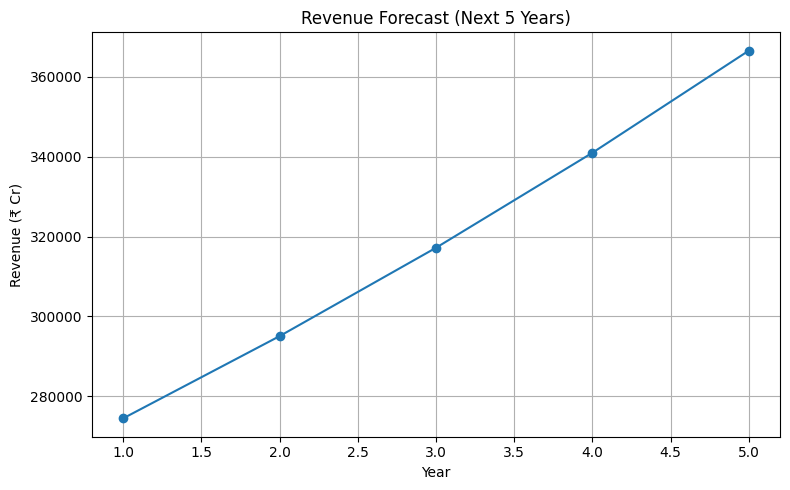

In [92]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, years + 1), revenue, marker='o')
plt.title("Revenue Forecast (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Revenue (₹ Cr)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
#EBIT FORECAST
#EBIT= Revenue*EBIT_margin

In [94]:
#EBIT=Revenue×Ebit_Margin%
#NOPAT=EBIT×(1-tax_rate%)
#D&A=Revenue×27.4%
#CapEx=Revenue×1.7%
#ΔNWC=Revenue×3%
#FCF=NOPAT+D&A-CapEx-ΔNWC

In [95]:
#EBIT:

EBIT=revenue*(ebit_margin/100)
EBIT=pd.Series(EBIT)
EBIT

,0
0,68618.325000
1,73764.699375
2,79297.051828
3,85244.330715
4,91637.655519


In [96]:
#NOPAT=EBIT*(1-tax_rate/100)

NOPAT=EBIT*(1-tax_rate/100)
NOPAT

,0
0,51052.033800
1,54880.936335
2,58997.006560
3,63421.782052
4,68178.415706


In [97]:
#D&A=Revenue*(3/100)
DnA=revenue*(DnA_per)/100
DnA

,0
0,5489.466000
1,5901.175950
2,6343.764146
3,6819.546457
4,7331.012442


In [98]:
#CapEx=Revenue*17/100
CapEx=revenue*(capex_per)/100
CapEx

,0
0,4666.046100
1,5015.999557
2,5392.199524
3,5796.614489
4,6231.360575


In [99]:
#ΔNWC=Revenue*1/100
change_NWC=revenue*(del_nwc_per)/100
change_NWC

,0
0,2744.733000
1,2950.587975
2,3171.882073
3,3409.773229
4,3665.506221


In [100]:
#FCF=NOPAT+D&A-CapEx-ΔNWC
FCF=NOPAT+DnA-change_NWC-CapEx
FCF

,0
0,49130.720700
1,52815.524752
2,56776.689109
3,61034.940792
4,65612.561352


In [101]:
# now,i will discount these fcfs using WACC(Weighted average cost of capital)(i will take it as 11.51 % as it is what i got from google)
# now ill calculate terminal value, enterprise value then adjust them for net debt  and get intrinsic value per share

In [102]:
# discounted fcf_t=fcf_t*discount_factor where discount_factor=(1/(1+wacc))^t

disc_FCF=[]
for i in range(years):
  disc_FCF.append(FCF[i]/(1+WACC/100)**(i+1))

disc_FCF=pd.Series(disc_FCF)
disc_FCF

,0
0,43594.250843
1,41582.803599
2,39664.164924
3,37834.052611
4,36088.382038


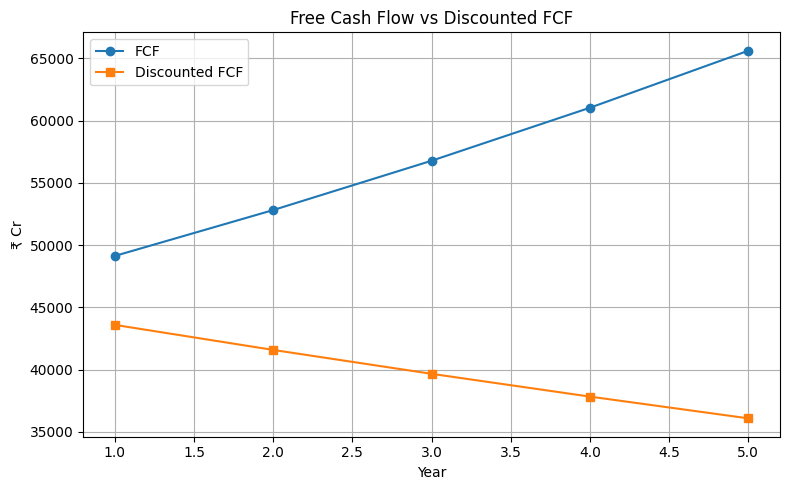

In [103]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, years + 1), FCF, label='FCF', marker='o')
plt.plot(range(1, years + 1), disc_FCF, label='Discounted FCF', marker='s')
plt.title("Free Cash Flow vs Discounted FCF")
plt.xlabel("Year")
plt.ylabel("₹ Cr")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [104]:
data_pred=pd.DataFrame(
    {"revenue":revenue,
     "EBIT":EBIT,
     "NOPAT":NOPAT,
     "D&A":DnA,
     "CapEx":CapEx,
     "ΔNWC":change_NWC,
     "FCF":FCF,
     "disc_FCF":disc_FCF
     }
    )
data_pred

,revenue,EBIT,NOPAT,D&A,CapEx,ΔNWC,FCF,disc_FCF
0,274473.300000,68618.325000,51052.033800,5489.466000,4666.046100,2744.733000,49130.720700,43594.250843
1,295058.797500,73764.699375,54880.936335,5901.175950,5015.999557,2950.587975,52815.524752,41582.803599
2,317188.207312,79297.051828,58997.006560,6343.764146,5392.199524,3171.882073,56776.689109,39664.164924
3,340977.322861,85244.330715,63421.782052,6819.546457,5796.614489,3409.773229,61034.940792,37834.052611
4,366550.622076,91637.655519,68178.415706,7331.012442,6231.360575,3665.506221,65612.561352,36088.382038


In [105]:
# Terminal_val=FCF_end*(1+g)/(WACC-G)
terminal_val=FCF[years-1]*(1+g/100)/(WACC/100-g/100)
discounted_terminal_val=terminal_val*(1/(1+WACC/100)**years)
discounted_terminal_val

np.float64(746057.8979076771)

In [106]:
#Enterprise value is the sum of all discounted cash flows and the discounted terminal value
sum=0.0
for _ in range(years):
  sum+=disc_FCF[_]
enterprise_val=sum+discounted_terminal_val
enterprise_val

np.float64(944821.5519230766)

In [107]:
# to get the equity value,subtract the debt from enterprise value

equity_val=enterprise_val-net_debt
equity_val

np.float64(954681.5519230766)

In [108]:
#now to find intrinsic value of the shares , divide total equity by the total number of outstanding shares

intrinsic_val=equity_val*1e7/outstanding_shares
intrinsic_val

np.float64(2638.635873713756)

In [109]:
#If DCF Intrinsic Value>Market Price→The stock is undervalued

#If DCF Intrinsic Value<Market Price→The stock is overvalued